# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

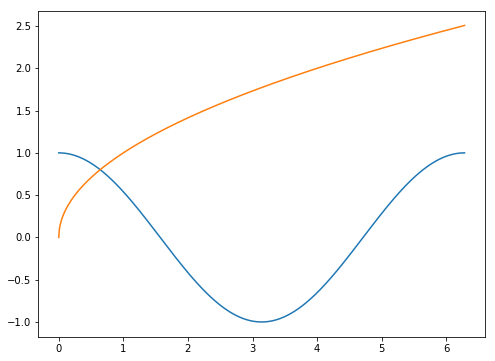

In [2]:
x = np.linspace(0., 2*pi, 600)
y1 = np.cos(x)
y2 = np.sqrt(x)

f = plt.figure(0, figsize=(8,6))
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [3]:
# visual inspection of the plot
visual = 0.65
print( "sqrt(0.65) =", np.sqrt(visual))
print( "cos(0.65)  =", np.cos(visual))

sqrt(0.65) = 0.806225774829855
cos(0.65)  = 0.7960837985490559


In [4]:
def fixed_point(func, x0, alpha, eps, max_it =1000):
    it = 1
    x_old = x0
    while it < max_it:
        x_new = x_old - alpha*func(x_old)
        if abs(x_new - x_old) < eps: 
            break
        x_old = x_new
        it += 1
        
    return x_new, it

def func1(x):
    return float(np.sqrt(x) - np.cos(x))

def func2(x):
    return float(0.5/np.sqrt(x) + np.sin(x))

In [5]:
res1, it1 = fixed_point(func1, 6.0, 1, 0.0001, 50)

print(" Fixed-point solution:", res1, "\n", "Visual solution:", visual)

 Fixed-point solution: 0.6417299439916119 
 Visual solution: 0.65


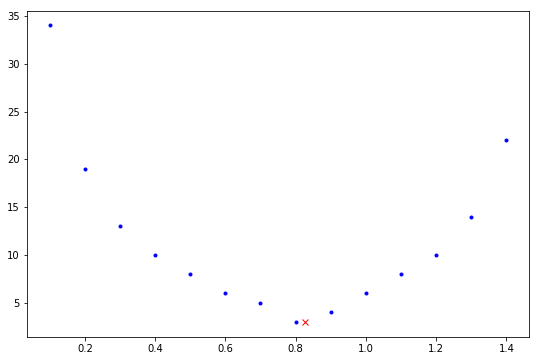

In [6]:
a = 0.6
b = 0.7
n = int( (b-a)*10 + 1 )
#n = 10

xd = np.linspace(a, b, n)
fi = np.abs( func2(xd) )
m = np.min(fi)
M = np.max(fi)

amin = 2.0/(m+M)
xamin,namin = fixed_point(func1, 0.7, amin, 0.0001)

alpha = np.linspace(0.1, 1.4, 14)
adim = len(alpha)
xa = np.zeros(adim, dtype='float64')
na = np.zeros(adim, dtype='int')
for k in range(adim):
    xa[k],na[k] = fixed_point(func1, 0.7, alpha[k], 0.0001)

f1 = plt.figure(1, figsize=(9,6))
plt.plot(alpha, na, 'b.')
plt.plot(amin, namin, 'rx')
plt.show()

Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [7]:
res, it = fixed_point(func1, 0.6, 1, 0.001)
print(res, it)

0.6416141219929243 4


# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [8]:
import math

In [9]:
def ctg(x):
    res = x - math.cos(x) / math.sin(x)
    return res

In [10]:
def inv_quad_interpolation(f, x, eps):
    y0 = f(x[0])
    y1 = f(x[1])
    y2 = f(x[2])
    x0 = x[0]
    x1 = x[1]
    x2 = x[2]
    
    it = 0
    while(1):
        x_new = ((x0 * y1 * y2) / ((y0 - y1) * (y0 - y2)))+ ((x1 * y0 * y2) / ((y1 - y0) * (y1 - y2))) + ((x2 * y1 * y0) / ((y2 - y0) * (y2 - y1)))
        x0 = x1
        x1 = x2
        x2 = x_new
        it+=1
        if (abs(f(x2)) <= eps):
            break
    return x2, it

Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

In [11]:
x = np.array([0.6, 0.8, 1])
x2, i = inv_quad_interpolation(ctg, x, 0.001)
print(x2, i)

0.8602782702895326 1


# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [12]:
def my_complex_func(x):
    return x**3 - 1

In [13]:
def my_complex_func2(x):
    return 3*x**2

In [28]:
def Newton(g, Df, x0, eps):
    x_res = np.zeros((20, 3), dtype=np.complex)
    x_res[0] = complex(x0)
    delta = 10
    it = 1
    while (delta > eps):
        x1 = x_res[it - 1, 0] - g(x_res[it - 1, 0]) / Df(x_res[it - 1, 0])
        r = x1.real ** 2 + x1.imag ** 2
        w = math.atan2(x1.imag, x1.real)
        x2 = complex(r*math.cos(w-2.0*pi/3.0),r*math.sin(w-2.0*pi/3.0))
        x3 = complex(r*math.cos(w+2.0*pi/3.0),r*math.sin(w+2.0*pi/3.0))
        x_res[it, 0] = x1
        x_res[it, 1] = x2
        x_res[it, 2] = x3
        delta = abs(x_res[it, 0]-x_res[it-1, 0])
        it += 1
    return x_res[:it], it

In [29]:
res, k = Newton(my_complex_func,my_complex_func2, 0.6, 0.001)
print(res)

[[ 0.6       +0.j          0.6       +0.j          0.6       +0.j        ]
 [ 1.32592593+0.j         -0.87903978-1.52254156j -0.87903978+1.52254156j]
 [ 1.07355144+0.j         -0.57625635-0.99810527j -0.57625635+0.99810527j]
 [ 1.00492409+0.j         -0.50493622-0.87457518j -0.50493622+0.87457518j]
 [ 1.00002409+0.j         -0.50002409-0.86606713j -0.50002409+0.86606713j]
 [ 1.        +0.j         -0.5       -0.8660254j  -0.5       +0.8660254j ]]


Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).